<a href="https://colab.research.google.com/github/prabhakarsharma-pythonaire/Data-Science-Bootcamp-/blob/main/Sentiment_Analysis_IMDB_reviews_ipynbSe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [5]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
kaggle_dict = json.load(open("kaggle.json"))

In [8]:
kaggle_dict

{'username': 'prabhakarsharma17', 'key': '6be0f49dcdd6c99de7540a382277dd40'}

In [14]:
#kaggle credentials
os.environ["KAGGLE_USERNAME"]=kaggle_dict["username"]
os.environ["KAGGLE_KEY"] = kaggle_dict["key"]

In [15]:
#download dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 93% 24.0M/25.7M [00:00<00:00, 120MB/s] 
100% 25.7M/25.7M [00:00<00:00, 111MB/s]


In [24]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


'/bin/bash: line 1: ls[0]: command not found'

In [25]:
#unip dataset
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip","r") as zip_ref:
  zip_ref.extractall()

In [26]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   kaggle.json   sample_data


In [28]:
data = pd.read_csv("/content/IMDB Dataset.csv")
data.shape

(50000, 2)

In [29]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [30]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [31]:
data.replace({"sentiment":{"positive":1,"negative":0}},inplace=True)

In [32]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [33]:
#split data
train_data,test_data = train_test_split(data,test_size=0.2,random_state=72)

In [34]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


**Data Preprocessing**

In [36]:
#Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [37]:
X_train

array([[   0,    0,    0, ...,  125,  722,   97],
       [   0,    0,    0, ...,   41,    4,  705],
       [   0,    0,    0, ...,    3,  337,  158],
       ...,
       [   0,    0,    0, ...,  558,    8,   22],
       [   0,    0,    0, ..., 1324,  281,  172],
       [   0,    0,    0, ...,  359,    5, 2537]], dtype=int32)

In [39]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [41]:
Y_train

48279    0
6244     1
41566    0
8874     0
24337    1
        ..
2885     0
20325    0
7242     1
5166     0
12760    0
Name: sentiment, Length: 40000, dtype: int64

In [42]:
#build model

model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=128,input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation = "sigmoid"))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [45]:
model.fit(X_train,Y_train,epochs=10,batch_size = 64,validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 207s 403ms/step - loss: 0.4108 - accuracy: 0.8109 - val_loss: 0.3598 - val_accuracy: 0.8382
Epoch 2/5
500/500 [==============================] - 189s 377ms/step - loss: 0.3082 - accuracy: 0.8741 - val_loss: 0.3673 - val_accuracy: 0.8597
Epoch 3/5
500/500 [==============================] - 185s 371ms/step - loss: 0.2358 - accuracy: 0.9068 - val_loss: 0.2979 - val_accuracy: 0.8820
Epoch 4/5
500/500 [==============================] - 183s 367ms/step - loss: 0.2016 - accuracy: 0.9221 - val_loss: 0.3209 - val_accuracy: 0.8779
Epoch 5/5
500/500 [==============================] - 188s 376ms/step - loss: 0.1729 - accuracy: 0.9340 - val_loss: 0.4032 - val_accuracy: 0.8635


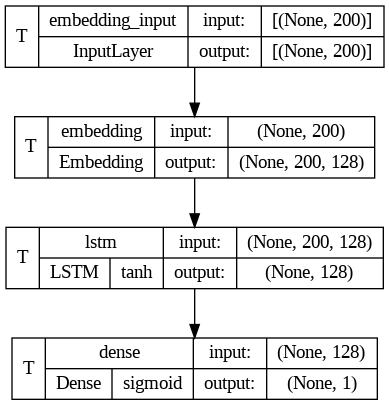

In [65]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png',show_layer_activations=True,show_trainable=True,show_layer_names=True)


In [46]:
loss ,accuracy = model.evaluate(X_test,Y_test)
print(f"Test Loss:{loss}")



313/313 [==============================] - 19s 60ms/step - loss: 0.4054 - accuracy: 0.8644
Test Loss:0.4053717851638794


Building a Predictive System

In [49]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [60]:
# example usage
new_review = "Loved the movie."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 62ms/step
The sentiment of the review is: positive


In [58]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 77ms/step
The sentiment of the review is: negative


In [69]:
inp=input("Enter the review to test")
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is :{sentiment}")

Enter the review to testgood
1/1 [==============================] - 0s 62ms/step
The sentiment of the review is :positive
